In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import pandas as pd

np.random.seed( 42 )

def rev_function( x, a, b ):
    ## cumulative revenue is a logarithmic growth function
    return a * np.log( x + 1 ) + b

def add_noise( val, sensitivity ):
    noise = abs( np.random.normal( 0, sensitivity ) )
    return val + noise

def rev_noise( revenue, sensitivity ):
    noised_revenue = []
    for i, x in enumerate( revenue ):
        noised_val = add_noise( x, sensitivity )
        if i > 0:
            if noised_val < noised_revenue[ i - 1 ]:
                noised_val = noised_revenue[ i - 1 ]
        noised_revenue.append( noised_val )
    return noised_revenue

def create_user( X, a_true, b_true ):
    true_cumulative_revenue = rev_function( X, a_true, b_true )
    noised_cumulative_revenue = rev_noise( true_cumulative_revenue, 5 )
    return noised_cumulative_revenue

num_users = 500
num_days = 60
x = np.arange( 1, num_days + 1 )

## true cumulative revenue function parameters
a_true, b_true = 2, 3

users_df = pd.DataFrame( columns=x )

for i in range( num_users ):
    this_user = create_user( x, a_true, b_true )
    users_df.loc[ len( users_df ) ] = this_user

In [27]:
from scipy.optimize import curve_fit

x_data = np.concatenate( [ x ] * len( users_df ) )
y_data = users_df.values.flatten()
popt, pcov = curve_fit( rev_function, x_data, y_data )

In [45]:
projection_endpoint = 90
users_projected = pd.DataFrame( columns = np.arange( num_days + 1, projection_endpoint + 1 ) )
for i, row in users_df.iterrows():
    x_data = users_df.columns
    y_data = row
    popt, pcov = curve_fit( rev_function, x_data, y_data )
    this_projection = [ rev_function( x_val, *popt ) for x_val in users_projected.columns ]
    users_projected.loc[ len( users_projected ) ] = this_projection

## bootstrap
users_projected_bootstrapped = users_projected.sample( frac=10, 
                                                        replace=True, 
                                                        random_state=1)



,61,62,63,64,65,66,67,68,69,70,...,81,82,83,84,85,86,87,88,89,90
37,23.906238,23.987074,24.066636,24.144966,24.222099,24.298072,24.372920,24.446675,24.519369,24.591032,...,25.318738,25.379977,25.440482,25.500272,25.559362,25.617768,25.675508,25.732595,25.789044,25.844869
235,23.759375,23.802704,23.845349,23.887334,23.928678,23.969400,24.009518,24.049051,24.088015,24.126427,...,24.516479,24.549303,24.581734,24.613781,24.645454,24.676760,24.707708,24.738307,24.768564,24.798486
396,20.786466,20.850227,20.912983,20.974766,21.035606,21.095531,21.154569,21.212744,21.270082,21.326607,...,21.900596,21.948899,21.996624,22.043784,22.090392,22.136461,22.182004,22.227032,22.271557,22.315590
72,22.594187,22.667705,22.740065,22.811303,22.881453,22.950549,23.018620,23.085698,23.151811,23.216986,...,23.878813,23.934507,23.989535,24.043912,24.097652,24.150771,24.203283,24.255202,24.306541,24.357312
255,24.200327,24.235220,24.269563,24.303374,24.336669,24.369463,24.401772,24.433608,24.464987,24.495920,...,24.810037,24.836471,24.862588,24.888397,24.913903,24.939114,24.964038,24.988680,25.013046,25.037143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,21.625983,21.671901,21.717095,21.761589,21.805403,21.848558,21.891074,21.932970,21.974262,22.014969,...,22.428330,22.463115,22.497484,22.531447,22.565012,22.598189,22.630986,22.663414,22.695479,22.727189
26,25.326349,25.402601,25.477652,25.551539,25.624299,25.695964,25.766568,25.836140,25.904712,25.972311,...,26.658753,26.716519,26.773593,26.829992,26.885732,26.940826,26.995292,27.049141,27.102389,27.155049
134,21.651303,21.726086,21.799691,21.872154,21.943512,22.013796,22.083039,22.151271,22.218522,22.284818,...,22.958032,23.014685,23.070659,23.125972,23.180637,23.234670,23.288086,23.340898,23.393120,23.444765
415,21.657123,21.698425,21.739076,21.779096,21.818506,21.857323,21.895565,21.933249,21.970390,22.007005,...,22.378811,22.410100,22.441014,22.471562,22.501753,22.531595,22.561096,22.590263,22.619104,22.647627


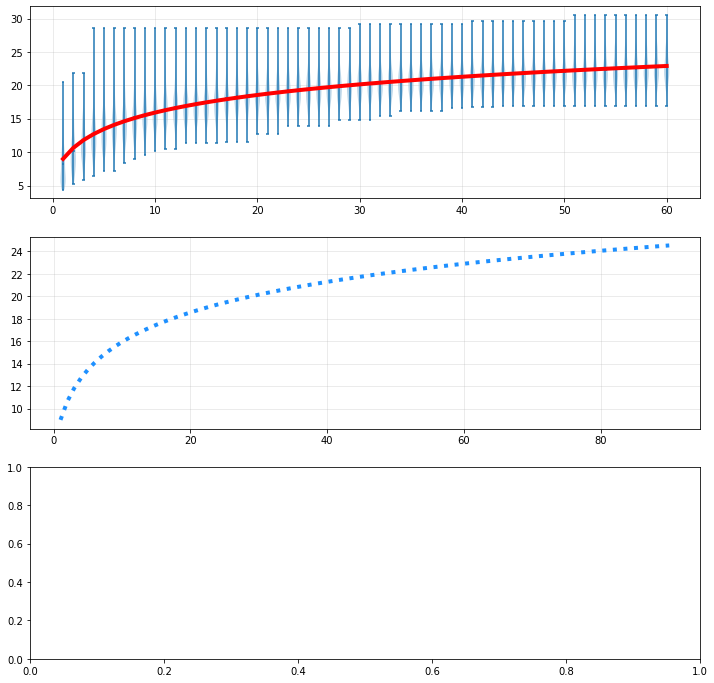

In [37]:
fig, axes = plt.subplots( 3, 1, figsize=( 12, 12 ) )
fitted_values = [ rev_function( x_val, *popt ) for x_val in x ]
axes[ 0 ].violinplot( users_df,
                  showmeans=True,
                  showmedians=False )
#axes[ 0 ].boxplot( users_df )
axes[ 0 ].plot( x, fitted_values, linewidth=4, color='red', linestyle='solid')
axes[ 0 ].grid( alpha=0.3 )

x_90 = np.arange( 1, 90 + 1 )
fitted_values_90 = [ rev_function( x_val, *popt ) for x_val in x_90 ]

axes[ 1 ].plot( x_90, fitted_values_90, color='dodgerblue', linewidth=4, linestyle='dotted' )
axes[ 1 ].grid( alpha=0.3 )